# Analyzing the Tate Collection
After focusing my previous project on the gender diversity of artists MoMA's collection, I've decided to look into other high profile art institutions. (This is the last art-museum-gender project from me for this class, I swear! Unless the Met makes more of their data available... in which case, I would love to answer the age old question, "Do women have to be naked to get into the Met Museum?") 

The Tate seems like a pretty progressive museum: They even publish gender pay gap and diversity reports about their workforce. But does their collection reflect their stated values? A cursory analysis below shows that their collection is 96% male, 4% female. That's pretty bad. I'd like to look into their acquisitions over time, as well as what kind of works (e.g. medium) they tend to acquire by male/female artists.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from cycler import cycler
%matplotlib inline 

In [2]:
art_df = pd.read_csv('tate_artwork_data.csv')
art_df.shape

/Users/angelawang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(69201, 20)

In [3]:
art_df.head()

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922.0,support: 394 x 419 mm,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 311 x 213 mm,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785,1922.0,support: 343 x 467 mm,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 318 x 394 mm,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,1919.0,image: 243 x 335 mm,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...


In [4]:
artist_df = pd.read_csv('artist_data.csv')
artist_df.shape

(3532, 9)

In [5]:
artist_df.head()

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...
3,1,"Abbott, Lemuel Francis",Male,1760–1803,1760.0,1803.0,"Leicestershire, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/lemuel-fran...
4,622,"Abrahams, Ivor",Male,born 1935,1935.0,NaN,"Wigan, United Kingdom",NaN,http://www.tate.org.uk/art/artists/ivor-abraha...


In [6]:
#Combine these two datasets

df = art_df.merge(artist_df, left_on='artist', right_on='name')
df.head()

,id_x,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,...,url_x,id_y,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url_y
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,...,http://www.tate.org.uk/art/artworks/blake-a-fi...,38,"Blake, Robert",Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,...,http://www.tate.org.uk/art/artworks/blake-two-...,38,"Blake, Robert",Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785,...,http://www.tate.org.uk/art/artworks/blake-the-...,38,"Blake, Robert",Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,...,http://www.tate.org.uk/art/artworks/blake-six-...,38,"Blake, Robert",Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,...,http://www.tate.org.uk/art/artworks/blake-the-...,39,"Blake, William",Male,1757–1827,1757.0,1827.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/william-bla...


In [7]:
df.dtypes

id_x                    int64
accession_number       object
artist                 object
artistRole             object
artistId                int64
title                  object
dateText               object
medium                 object
creditLine             object
year                   object
acquisitionYear       float64
dimensions             object
width                  object
height                 object
depth                 float64
units                  object
inscription            object
thumbnailCopyright     object
thumbnailUrl           object
url_x                  object
id_y                    int64
name                   object
gender                 object
dates                  object
yearOfBirth           float64
yearOfDeath           float64
placeOfBirth           object
placeOfDeath           object
url_y                  object
dtype: object

In [8]:
df.gender.value_counts()

Male      65892
Female     2727
Name: gender, dtype: int64

In [9]:
df.gender.value_counts(normalize=True)

Male      0.960259
Female    0.039741
Name: gender, dtype: float64

In [10]:
#convert acquisitionYear column from float to int
df['acquisitionYear'] = df.acquisitionYear.fillna(0).astype(int)

In [12]:
#now convert it to a datetime object
df['acquisitionYear'] = pd.to_datetime(df['acquisitionYear'], format="%Y", errors='coerce')

In [13]:
df.acquisitionYear.value_counts().head(2)

1856-01-01    37895
1997-01-01     3733
Name: acquisitionYear, dtype: int64

In [15]:
# new column counting male artists
df['males'] = df.gender.str.count('Male')

In [16]:
# new column counting female artists
df['females'] = df.gender.str.count('Female')

In [17]:
df

,id_x,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,...,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url_y,males,females
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,...,"Blake, Robert",Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...,1.0,0.0
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,...,"Blake, Robert",Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...,1.0,0.0
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785,...,"Blake, Robert",Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...,1.0,0.0
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,...,"Blake, Robert",Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...,1.0,0.0
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,...,"Blake, William",Male,1757–1827,1757.0,1827.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/william-bla...,1.0,0.0
5,1040,A00006,"Blake, William",artist,39,Ciampolo the Barrator Tormented by the Devils,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,...,"Blake, William",Male,1757–1827,1757.0,1827.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/william-bla...,1.0,0.0
6,1041,A00007,"Blake, William",artist,39,The Baffled Devils Fighting,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,...,"Blake, William",Male,1757–1827,1757.0,1827.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/william-bla...,1.0,0.0
7,1042,A00008,"Blake, William",artist,39,The Six-Footed Serpent Attacking Agnolo Brunel...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,...,"Blake, William",Male,1757–1827,1757.0,1827.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/william-bla...,1.0,0.0
8,1043,A00009,"Blake, William",artist,39,The Serpent Attacking Buoso Donati,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,...,"Blake, William",Male,1757–1827,1757.0,1827.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/william-bla...,1.0,0.0
9,1044,A00010,"Blake, William",artist,39,The Pit of Disease: The Falsifiers,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,...,"Blake, William",Male,1757–1827,1757.0,1827.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/william-bla...,1.0,0.0


In [38]:

plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'axes.facecolor' : '#ffffff',
    'axes.axisbelow':True, 
    'axes.grid' : True,
    'grid.color' : '#bec0c2',
    'grid.linestyle' : 'dotted',
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right' : False,
    'axes.prop_cycle': cycler('color', ['#e81c61', '#ffb845', '#fc6b4a', '#f9f871', '#31517a', '#3f0092']),
    'xtick.bottom'  : False,
    'ytick.left': False,
    'figure.titlesize' : 'large', 
    'figure.titleweight' : 'bold',
    'figure.facecolor' : '#ffffff',
    'text.color' : '#595959',
    'axes.labelcolor' : '#595959',
    'xtick.color' : '#595959',
    'ytick.color' : '#595959',
    'legend.loc' : 'best',
    'legend.fancybox'    : True,
    'legend.frameon'     : True,
    'legend.edgecolor'     : '0.9',
    'legend.markerscale'   : '0.5',
    'lines.marker'      : None,
    'lines.markersize'  : 3,           
})

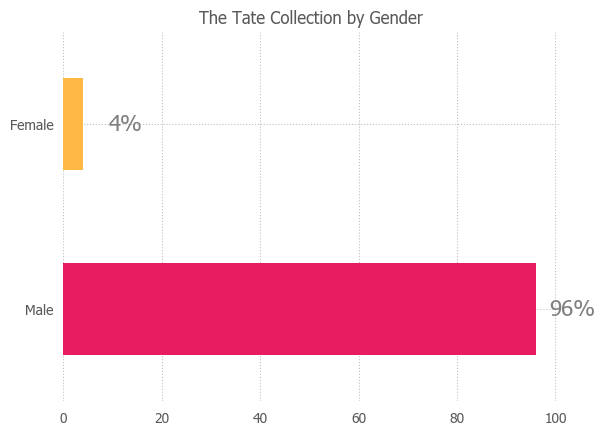

In [74]:
ax = (df.gender.value_counts(normalize=True)*100).plot(kind='barh', title="The Tate Collection by Gender")
for i, bar in enumerate(ax.patches):
    value = str(int(round(bar.get_width()))) + "%"
    x_pos = bar.get_width() + 12
    y_pos = i
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='grey', fontsize=16)

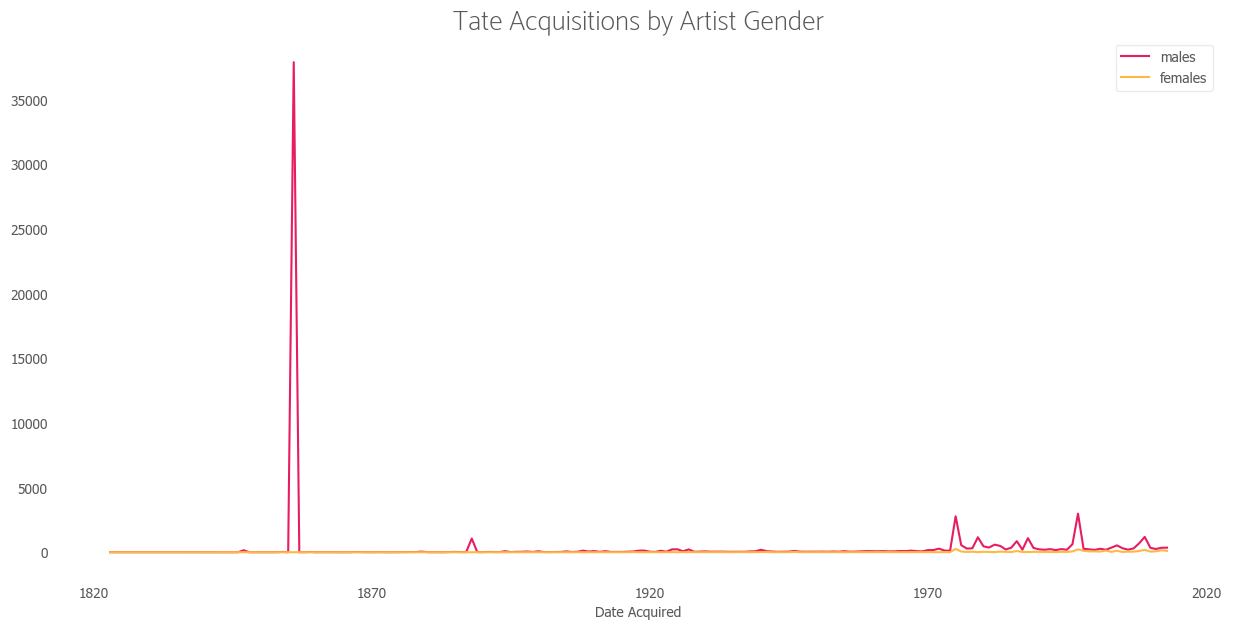

In [43]:
ax = df.resample('A', on='acquisitionYear').sum().plot(y=['males', 'females'], figsize=(15,7), title='Tate Acquisitions by Artist Gender')
ax.set_xlabel("Date Acquired")

ax.title.set_fontsize(20)
ax.title.set_fontname('Catamaran')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)


Text(0,0.5,'')

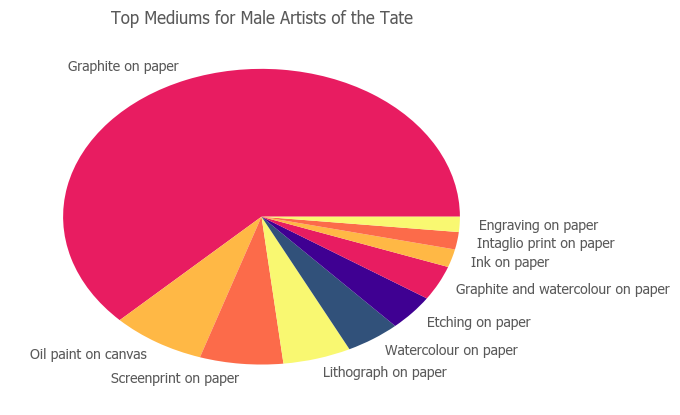

In [49]:
#what kind of works are males and females making?
ax = df[df.gender=='Male'].medium.value_counts().head(10).plot(kind='pie', title="Top Mediums for Male Artists of the Tate")
ax.set_ylabel('')

Text(0,0.5,'')

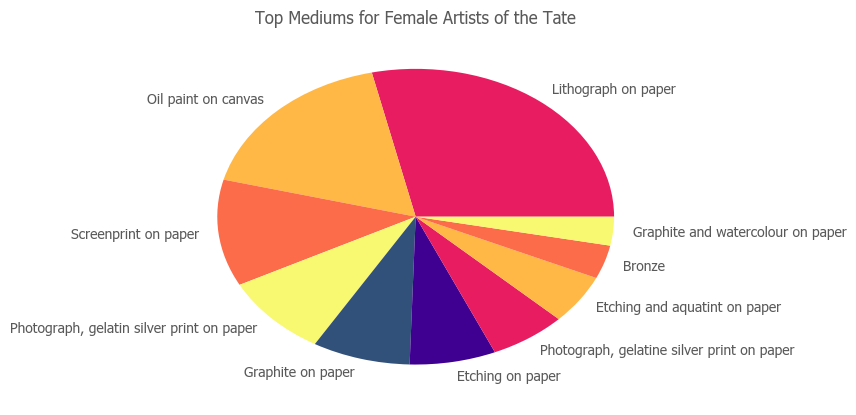

In [51]:
ax = df[df.gender=='Female'].medium.value_counts().head(10).plot(kind='pie', title = "Top Mediums for Female Artists of the Tate")
ax.set_ylabel('')